In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

# Working with Time Series Exercises

## Mini exercise 

1. import the datetime module from the datetime library



In [2]:
url = 'https://gist.githubusercontent.com/misty-garcia/\
8c099128d3f59c32afaa5aa2c3e4fb62/raw/2a4c06ea955266e276a78af5d2e1083cfd348703/mockdates'

df = pd.read_csv(url,sep='\t')
df

,date
0,Mar - 27 - 2022
1,May - 22 - 2022
2,May - 16 - 2022
3,Aug - 22 - 2022
4,Mar - 15 - 2022
...,...
95,Jan - 04 - 2022
96,Mar - 24 - 2022
97,Aug - 28 - 2022
98,Jan - 31 - 2022


2. convert the date column to a datetime


In [3]:
df.date = pd.to_datetime(df.date)
df

,date
0,2022-03-27
1,2022-05-22
2,2022-05-16
3,2022-08-22
4,2022-03-15
...,...
95,2022-01-04
96,2022-03-24
97,2022-08-28
98,2022-01-31


3. subtract one day from each date


In [4]:
df.date = df.date - timedelta(days=1)
df

,date
0,2022-03-26
1,2022-05-21
2,2022-05-15
3,2022-08-21
4,2022-03-14
...,...
95,2022-01-03
96,2022-03-23
97,2022-08-27
98,2022-01-30


4. reformat the dates as "Sun - March 26, 2022"

In [5]:
# "Sun - March 26, 2022"
# datetime.strftime
df.date = df.date.dt.strftime('%a - %B %d, %Y')
df

,date
0,"Sat - March 26, 2022"
1,"Sat - May 21, 2022"
2,"Sun - May 15, 2022"
3,"Sun - August 21, 2022"
4,"Mon - March 14, 2022"
...,...
95,"Mon - January 03, 2022"
96,"Wed - March 23, 2022"
97,"Sat - August 27, 2022"
98,"Sun - January 30, 2022"


## Exercises

### Part 1

data.sf_temps()
Use the above dataset for the following exercises:



In [6]:
sf = data.sf_temps().set_index('date').sort_index()
sf

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.


In [7]:
day_temp_avg = sf.resample('D').mean()
day_temp_avg

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

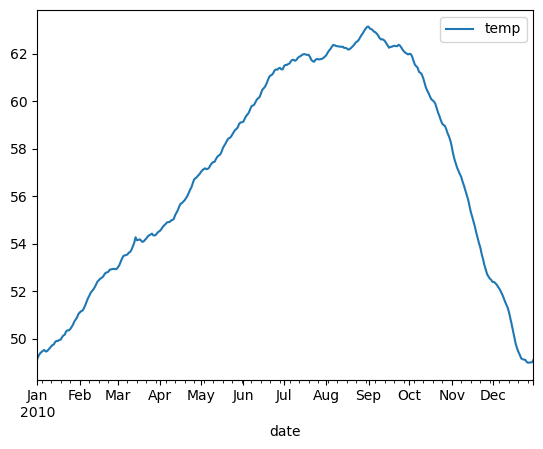

In [8]:
day_temp_avg.plot()

#### 2. Write the code necessary to visualize the minimum temperature over time.


<AxesSubplot:xlabel='date'>

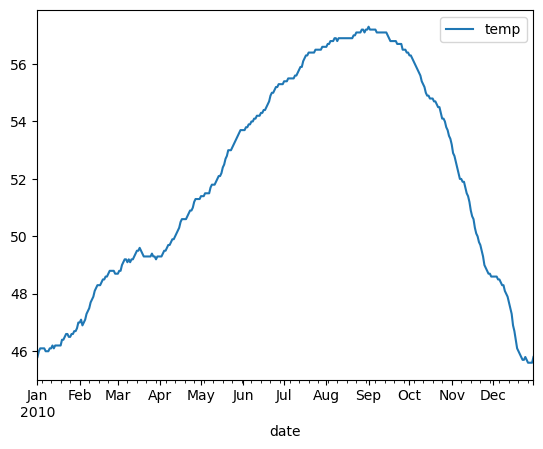

In [9]:
sf.resample('D').min().plot()

#### 3. Write the code necessary to visualize the maximum temperature over time.


<AxesSubplot:xlabel='date'>

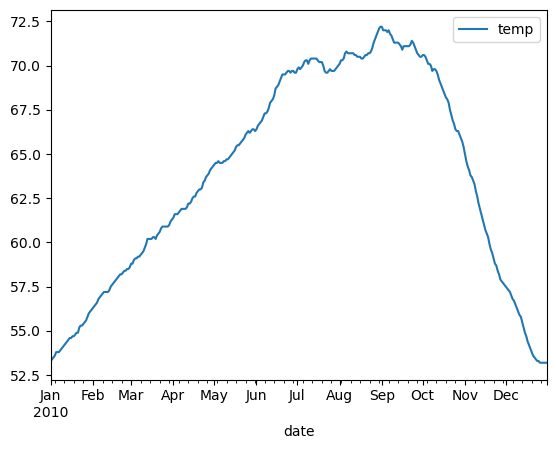

In [10]:
sf.resample('D').max().plot()

#### 4. Which month is the coldest, on average?


In [11]:
month_temp_avg = sf.resample('M').mean()
month_temp_avg[month_temp_avg.temp == month_temp_avg.temp.min()].index[0].strftime('%B')

'January'

#### 5. Which month has the highest average temperature?


In [12]:
month_temp_avg = sf.resample('M').mean()
month_temp_avg[month_temp_avg.temp == month_temp_avg.temp.max()].index[0].strftime('%B')

'September'

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [13]:
day_temp_mm = sf.resample('D').agg(temp_min=('temp', 'min'),temp_max=('temp', 'max'))
day_temp_mm

,temp_min,temp_max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8
...,...,...
2010-12-27,45.6,53.2
2010-12-28,45.6,53.2
2010-12-29,45.6,53.2


In [14]:
day_temp_mm['temp_var'] = abs(day_temp_mm['temp_min']-day_temp_mm['temp_max'])
day_temp_mm

,temp_min,temp_max,temp_var
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [15]:
day_temp_mm[day_temp_mm.temp_var==day_temp_mm.temp_var.max()].index[0].strftime('%B')

'August'

#### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 separate lines.


In [16]:
daily_temps = sf.resample('D').agg(temp_min=('temp', 'min'),temp_avg=('temp', 'mean'),temp_max=('temp', 'max'))
daily_temps

,temp_min,temp_avg,temp_max
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4
2010-01-03,46.1,49.391667,53.5
2010-01-04,46.1,49.445833,53.6
2010-01-05,46.1,49.491667,53.8
...,...,...,...
2010-12-27,45.6,48.991667,53.2
2010-12-28,45.6,49.000000,53.2
2010-12-29,45.6,49.012500,53.2


<AxesSubplot:xlabel='date'>

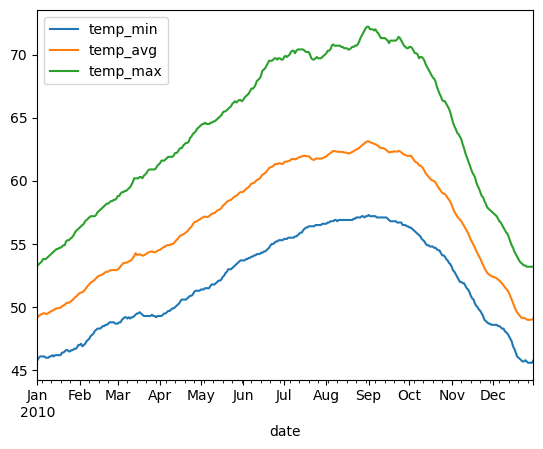

In [17]:
daily_temps.plot()

### Part 2

data.seattle_weather()
Use the above dataset for the following exercises:


In [18]:
sw = data.seattle_weather().set_index('date').sort_index()
sw

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


#### 1. Which year and month combination has the highest amount of precipitation?


In [19]:
sw.resample('M').sum().precipitation.idxmax()

Timestamp('2015-12-31 00:00:00', freq='M')

#### 2. Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

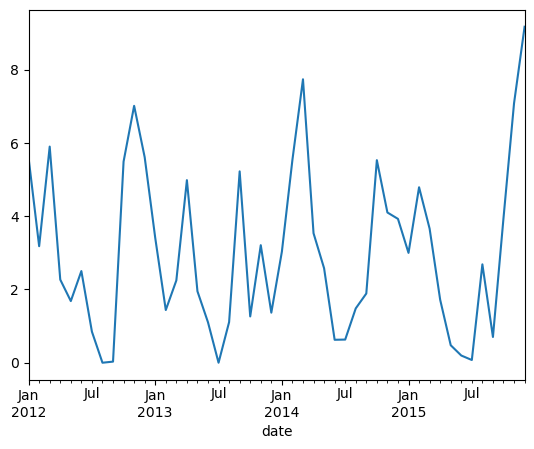

In [20]:
sw.resample('M').precipitation.mean().plot()

#### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

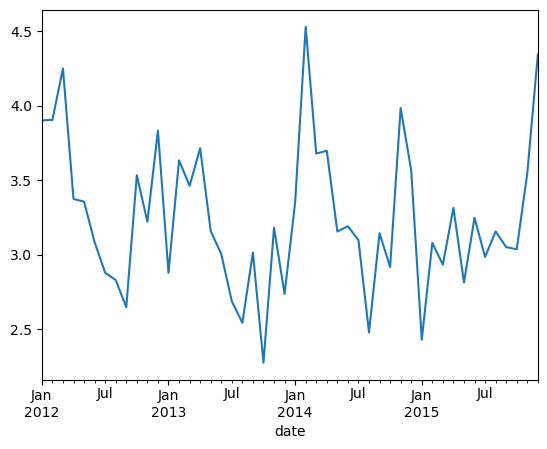

In [21]:
sw.resample('M').wind.mean().plot()

#### 4. Which year-month combination is the windiest?


In [22]:
sw.resample('M').wind.mean()[sw.resample('M').wind.mean()==sw.resample('M').wind.mean().max()].index[0].strftime('%Y %B')

'2014 February'

#### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [23]:
sw.weather.value_counts()

sun        714
fog        411
rain       259
drizzle     54
snow        23
Name: weather, dtype: int64

In [24]:
sw [sw.weather=='sun'].index.year.value_counts()

2014    211
2013    205
2015    180
2012    118
Name: date, dtype: int64

#### 6. In which month does it rain the most?


In [25]:
sw = sw.assign(rainy=((sw.weather=='rain')|(sw.weather=='drizzle')))
sw

,precipitation,temp_max,temp_min,wind,weather,rainy
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,True
2012-01-02,10.9,10.6,2.8,4.5,rain,True
2012-01-03,0.8,11.7,7.2,2.3,rain,True
2012-01-04,20.3,12.2,5.6,4.7,rain,True
2012-01-05,1.3,8.9,2.8,6.1,rain,True
...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,False
2015-12-28,1.5,5.0,1.7,1.3,fog,False
2015-12-29,0.0,7.2,0.6,2.6,fog,False


In [26]:
# sw.resample('M').rainy.sum()[sw.resample('M').rainy.sum()==sw.resample('M').rainy.sum().max()].index[0].strftime('%B')
sw = sw.assign(month=sw.index.strftime('%B'))

In [27]:
sw.groupby('month').rainy.sum()[sw.groupby('month').rainy.sum()==sw.groupby('month').rainy.sum().max()].index[0]

'January'

#### 7. Which month has the most number of days with a non-zero amount of precipitation?


In [28]:
sw = sw.assign(has_prc=sw.precipitation>0)
sw

,precipitation,temp_max,temp_min,wind,weather,rainy,month,has_prc
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,True,January,False
2012-01-02,10.9,10.6,2.8,4.5,rain,True,January,True
2012-01-03,0.8,11.7,7.2,2.3,rain,True,January,True
2012-01-04,20.3,12.2,5.6,4.7,rain,True,January,True
2012-01-05,1.3,8.9,2.8,6.1,rain,True,January,True
...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog,False,December,True
2015-12-28,1.5,5.0,1.7,1.3,fog,False,December,True
2015-12-29,0.0,7.2,0.6,2.6,fog,False,December,False


In [29]:
sw.groupby('month').has_prc.sum()[sw.groupby('month').has_prc.sum()==sw.groupby('month').has_prc.sum().max()].index[0]

'December'

### Part 3

data.flights_20k()
Use the above dataset for the following exercises:



In [30]:
fl20 = data.flights_20k().set_index('date').sort_index()
fl20

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,-5,318,FLL,JAX
2001-03-31 21:05:00,-1,451,MCI,IND


#### 1. Convert any negative delays to 0.


In [31]:
fl20.loc[fl20['delay'] < 0, 'delay'] = 0
fl20

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU
...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU
2001-03-31 21:05:00,0,318,FLL,JAX
2001-03-31 21:05:00,0,451,MCI,IND


#### 2. Which hour of the day has the highest average delay?


In [32]:
fl20 = fl20.assign(hour=fl20.index.strftime('%H'))
fl20

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,00
2001-01-01 06:20:00,0,491,BNA,MCI,06
2001-01-01 06:30:00,0,251,MDW,STL,06
2001-01-01 07:00:00,0,361,OAK,ONT,07
2001-01-01 07:00:00,0,303,MSY,HOU,07
...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,21
2001-03-31 21:05:00,0,318,FLL,JAX,21
2001-03-31 21:05:00,0,451,MCI,IND,21


In [33]:
# fl20.resample('H').delay.mean()[fl20.resample('H').delay.mean()==fl20.resample('H').delay.mean().max()]
fl20.groupby('hour').delay.mean()[fl20.groupby('hour').delay.mean()==fl20.groupby('hour').delay.mean().max()].index[0]

'03'

#### 3. Does the day of the week make a difference in the delay amount?


In [34]:
fl20 = fl20.assign(day_of_week=fl20.index.strftime('%a'))
fl20

,delay,distance,origin,destination,hour,day_of_week
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,00,Mon
2001-01-01 06:20:00,0,491,BNA,MCI,06,Mon
2001-01-01 06:30:00,0,251,MDW,STL,06,Mon
2001-01-01 07:00:00,0,361,OAK,ONT,07,Mon
2001-01-01 07:00:00,0,303,MSY,HOU,07,Mon
...,...,...,...,...,...,...
2001-03-31 21:02:00,26,303,MSY,HOU,21,Sat
2001-03-31 21:05:00,0,318,FLL,JAX,21,Sat
2001-03-31 21:05:00,0,451,MCI,IND,21,Sat


In [35]:
fl20.groupby('day_of_week').delay.mean()

day_of_week
Fri    17.757596
Mon     7.165772
Sat     8.431498
Sun    10.413542
Thu    12.821322
Tue     9.410866
Wed    11.032478
Name: delay, dtype: float64

#### 4. Does the month make a difference in the delay amount?


In [37]:
fl20.resample('M').delay.mean()

date
2001-01-31    11.301592
2001-02-28    12.306106
2001-03-31     9.875287
Freq: M, Name: delay, dtype: float64

### Bonus

data.iowa_electricity()
Use the above dataset for the following exercises:



In [38]:
ie = data.iowa_electricity().set_index('year').sort_index()
ie.head()

,source,net_generation
year,,
2001-01-01,Fossil Fuels,35361
2001-01-01,Nuclear Energy,3853
2001-01-01,Renewables,1437
2002-01-01,Fossil Fuels,35991
2002-01-01,Nuclear Energy,4574


#### 1. For each row, calculate the percentage of the year's total that energy source provided.


In [39]:
ie.source.value_counts()

Fossil Fuels      17
Nuclear Energy    17
Renewables        17
Name: source, dtype: int64

In [40]:
ie = ie.assign(total=ie.resample('AS').net_generation.sum())
ie.head()

,source,net_generation,total
year,,,
2001-01-01,Fossil Fuels,35361,40651
2001-01-01,Nuclear Energy,3853,40651
2001-01-01,Renewables,1437,40651
2002-01-01,Fossil Fuels,35991,42528
2002-01-01,Nuclear Energy,4574,42528


In [41]:
ie = ie.assign(percent=round((ie.net_generation/ie.total),2))
ie.head()

,source,net_generation,total,percent
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.87
2001-01-01,Nuclear Energy,3853,40651,0.09
2001-01-01,Renewables,1437,40651,0.04
2002-01-01,Fossil Fuels,35991,42528,0.85
2002-01-01,Nuclear Energy,4574,42528,0.11


#### 2. Lineplot of generation over time, color by source


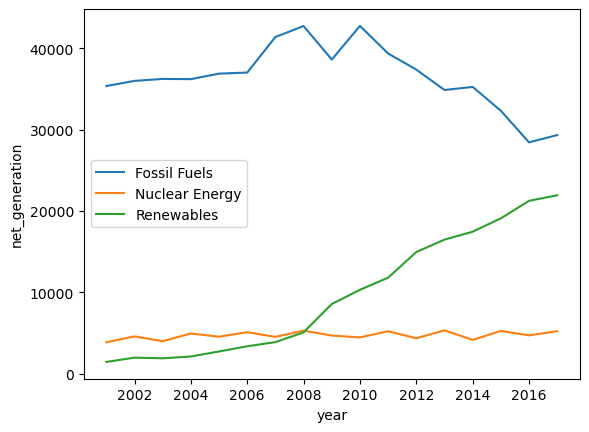

In [42]:
sns.lineplot(data=ie[ie.source=='Fossil Fuels'],x='year',y='net_generation',label='Fossil Fuels')
sns.lineplot(data=ie[ie.source=='Nuclear Energy'],x='year',y='net_generation',label='Nuclear Energy')
sns.lineplot(data=ie[ie.source=='Renewables'],x='year',y='net_generation',label='Renewables')
plt.show()

#### 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)


In [43]:
ie_piv = ie.drop(columns=['total','percent']).pivot_table(index='source',columns='year')
ie_piv

net_generation                                              \
year               2001-01-01 2002-01-01 2003-01-01 2004-01-01 2005-01-01   
source                                                                      
Fossil Fuels            35361      35991      36234      36205      36883   
Nuclear Energy           3853       4574       3988       4929       4538   
Renewables               1437       1963       1885       2102       2724   

                                                                       \
year           2006-01-01 2007-01-01 2008-01-01 2009-01-01 2010-01-01   
source                                                                  
Fossil Fuels        37014      41389      42734      38620      42750   
Nuclear Energy       5095       4519       5282       4679       4451   
Renewables           3364       3870       5070       8560      10308   

                                                                       \
year           2011-01-01 2012-01-01 2013-01-01 2014-01-01 2015-01-01   
source                                                                  
Fossil Fuels        39361      37379      34873      35250      32319   
Nuclear Energy       5215       4347       5321       4152       5243   
Renewables          11795      14949      16476      17452      19091   

                                      
year           2016-01-01 2017-01-01  
source                                
Fossil Fuels        28437      29329  
Nuclear Energy       4703       5214  
Renewables          21241      21933

#### 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?


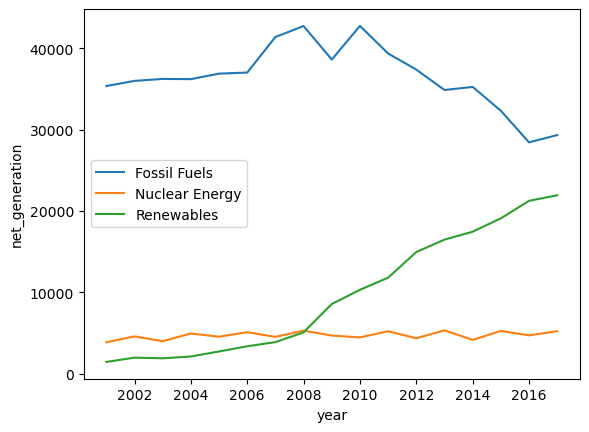

In [44]:
sns.lineplot(data=ie[ie.source=='Fossil Fuels'],x='year',y='net_generation',label='Fossil Fuels')
sns.lineplot(data=ie[ie.source=='Nuclear Energy'],x='year',y='net_generation',label='Nuclear Energy')
sns.lineplot(data=ie[ie.source=='Renewables'],x='year',y='net_generation',label='Renewables')
plt.show()

#### 5. Is the total generation increasing over time?


<AxesSubplot:xlabel='year'>

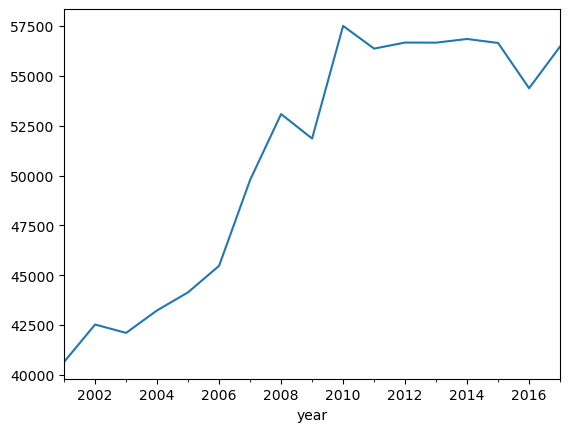

In [45]:
ie.groupby('year').total.mean().plot()

- How would you control for increasing consumption over time when considering how much energy is coming from each source?
- express each number as a % of the year's total


In [46]:
# I'm confused on what's being asked here
# nuke is steady
# renewables increasing
# fossils decreasing
# I'm assuming fossil fuels are being scaled back while renewable energy increases, 
# probably slow the decrease in fossil fuel generation of consumption increases and
# renewable and nuclear can't keep up

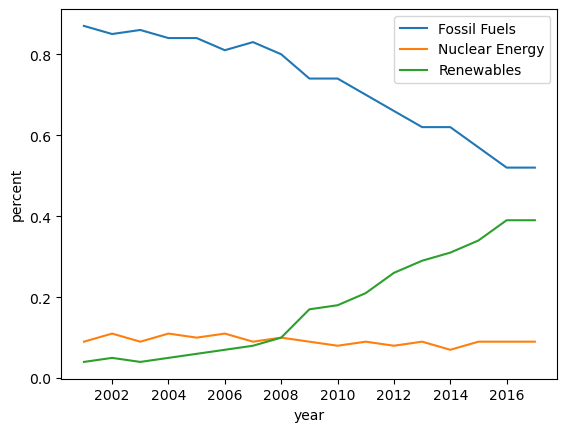

In [47]:
sns.lineplot(data=ie[ie.source=='Fossil Fuels'],x='year',y='percent',label='Fossil Fuels')
sns.lineplot(data=ie[ie.source=='Nuclear Energy'],x='year',y='percent',label='Nuclear Energy')
sns.lineplot(data=ie[ie.source=='Renewables'],x='year',y='percent',label='Renewables')
plt.show()

### Bonus 2

#### 1. Use the sf_temps dataset


In [48]:
sft=sf

#### 2. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)


In [49]:
sft = sft.assign(feels=pd.cut(sft.temp,4,labels=['cold','cool','warm','hot']))
sft = sft.assign(feels_n=pd.cut(sft.temp,4,labels=[0,1,2,3]))
sft

,temp,feels,feels_n
date,,,
2010-01-01 00:00:00,47.8,cold,0
2010-01-01 01:00:00,47.4,cold,0
2010-01-01 02:00:00,46.9,cold,0
2010-01-01 03:00:00,46.5,cold,0
2010-01-01 04:00:00,46.0,cold,0
...,...,...,...
2010-12-31 19:00:00,50.4,cold,0
2010-12-31 20:00:00,49.9,cold,0
2010-12-31 21:00:00,49.4,cold,0


#### 3. How does the occurrences of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.


In [50]:
sft.feels.value_counts()/24

cool    156.416667
cold     90.375000
warm     75.875000
hot      42.291667
Name: feels, dtype: float64

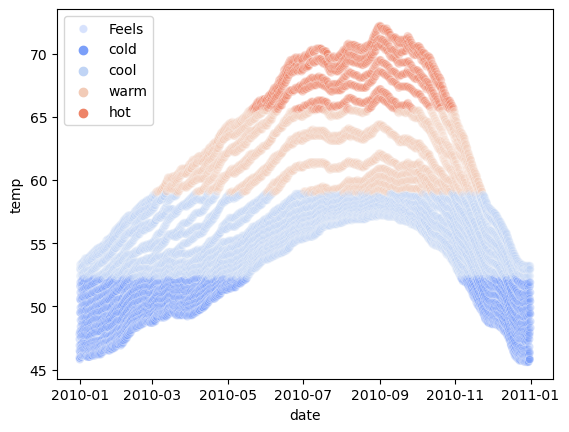

In [51]:
sns.scatterplot(data=sft,x='date',y='temp',hue='feels_n',alpha=.3,palette='coolwarm')
plt.legend(labels=['Feels','cold','cool','warm','hot'])
plt.show()

#### 4. Create pretty labels for time plots


In [52]:
# what do you mean? like I already did?

#### 5. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar


In [53]:
sft = sft.assign(month=sft.index.strftime('%B'))
sft

,temp,feels,feels_n,month
date,,,,
2010-01-01 00:00:00,47.8,cold,0,January
2010-01-01 01:00:00,47.4,cold,0,January
2010-01-01 02:00:00,46.9,cold,0,January
2010-01-01 03:00:00,46.5,cold,0,January
2010-01-01 04:00:00,46.0,cold,0,January
...,...,...,...,...
2010-12-31 19:00:00,50.4,cold,0,December
2010-12-31 20:00:00,49.9,cold,0,December
2010-12-31 21:00:00,49.4,cold,0,December


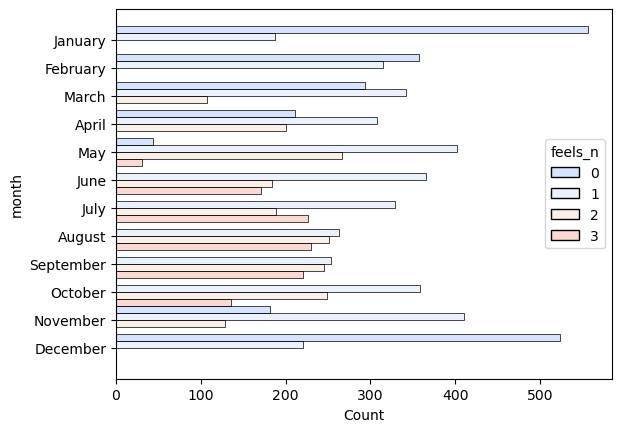

In [54]:
sns.histplot(data=sft,y='month',multiple='dodge',hue='feels_n',alpha=.3,palette='coolwarm')
# plt.legend(labels=['Feels','cold','cool','warm','hot'])
plt.show()

### Bonus 3
#### Explore the birdstrikes dataset.


df = data.birdstrikes()

In [55]:
bs = data.birdstrikes()
bs

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Flight_Date,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
0,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,1/8/90 0:00,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/9/90 0:00,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
2,BARKSDALE AIR FORCE BASE ARPT,B-52,None,1/11/90 0:00,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
3,NEW ORLEANS INTL,B-737-300,Substantial,1/11/90 0:00,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
4,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,1/12/90 0:00,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,LAGUARDIA NY,A-319,None,7/24/02 0:00,US AIRWAYS*,New York,Climb,Small,European starling,Day,0,0,0,NaN
9996,DALLAS/FORT WORTH INTL ARPT,MD-83,None,7/24/02 0:00,AMERICAN AIRLINES,Texas,Descent,Small,Unknown bird - small,Day,0,0,0,250.0
9997,DENVER INTL AIRPORT,MD-82,None,7/24/02 0:00,AMERICAN AIRLINES,Colorado,Take-off run,Small,Horned lark,Day,0,0,0,120.0
9998,BARKSDALE AIR FORCE BASE ARPT,B-52H,None,7/25/02 0:00,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,110.0


In [56]:
bs.Flight_Date = pd.to_datetime(bs.Flight_Date)
bs = bs.set_index('Flight_Date').sort_index()
bs

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
Flight_Date,,,,,,,,,,,,,
1990-01-08,BARKSDALE AIR FORCE BASE ARPT,T-38A,None,MILITARY,Louisiana,Climb,Large,Turkey vulture,Day,0,0,0,300.0
1990-01-09,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,MILITARY,Louisiana,Approach,Medium,Unknown bird or bat,Night,0,0,0,200.0
1990-01-11,BARKSDALE AIR FORCE BASE ARPT,B-52,None,MILITARY,Louisiana,Take-off run,Medium,Unknown bird or bat,Day,0,0,0,130.0
1990-01-11,NEW ORLEANS INTL,B-737-300,Substantial,SOUTHWEST AIRLINES,Louisiana,Take-off run,Small,Rock pigeon,Day,0,0,0,140.0
1990-01-12,BARKSDALE AIR FORCE BASE ARPT,KC-10A,None,MILITARY,Louisiana,Climb,Medium,Unknown bird or bat,Day,0,0,0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-07-24,LAGUARDIA NY,A-319,None,US AIRWAYS*,New York,Climb,Small,European starling,Day,0,0,0,NaN
2002-07-24,DALLAS/FORT WORTH INTL ARPT,MD-83,None,AMERICAN AIRLINES,Texas,Descent,Small,Unknown bird - small,Day,0,0,0,250.0
2002-07-24,DENVER INTL AIRPORT,MD-82,None,AMERICAN AIRLINES,Colorado,Take-off run,Small,Horned lark,Day,0,0,0,120.0


In [57]:
bs.When__Time_of_day.value_counts()

Day      5624
Night    3363
Dusk      584
Dawn      429
Name: When__Time_of_day, dtype: int64

In [58]:
bs.When__Phase_of_flight.value_counts()

Approach        4619
Climb           1956
Take-off run    1592
Landing Roll    1405
Descent          399
Taxi              18
Parked            11
Name: When__Phase_of_flight, dtype: int64

In [59]:
bs.Wildlife__Size.value_counts()

Small     4910
Medium    4346
Large      744
Name: Wildlife__Size, dtype: int64

In [60]:
bs.Wildlife__Species.value_counts()

Unknown bird - small     3572
Unknown bird - medium    3372
Unknown bird or bat       629
Unknown bird - large      436
European starling         319
Rock pigeon               232
Mourning dove             217
Canada goose              190
Red-tailed hawk           100
Ring-billed gull           87
American kestrel           83
Pacific golden-plover      65
Killdeer                   64
Mallard                    63
American robin             62
Herring gull               52
Barn owl                   47
American crow              41
Barn swallow               38
White-tailed deer          34
Turkey vulture             33
Eastern meadowlark         30
Laughing gull              29
Coyote                     26
Great blue heron           25
Zebra dove                 25
Horned lark                22
Western meadowlark         19
Cattle egret               16
Tree swallow               14
Cliff swallow              13
Blackbirds                 10
Meadowlarks                10
Short-eare

In [61]:
bs[bs.Wildlife__Size=='Large'].Wildlife__Species.value_counts()

Unknown bird - large    436
Canada goose            190
White-tailed deer        34
Turkey vulture           33
Coyote                   26
Great blue heron         25
Name: Wildlife__Species, dtype: int64

In [62]:
bs[bs.Wildlife__Species=='White-tailed deer']

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
Flight_Date,,,,,,,,,,,,,
1990-05-01,CHICAGO O'HARE INTL ARPT,B-727,None,UNITED AIRLINES,Illinois,Climb,Large,White-tailed deer,Night,0,0,0,120.0
1991-08-03,ORLANDO INTL,PA-28,Minor,PRIVATELY OWNED,Florida,Landing Roll,Large,White-tailed deer,Day,0,0,0,NaN
1991-10-25,WASHINGTON DULLES INTL ARPT,B-737-300,Substantial,UNITED AIRLINES,DC,Landing Roll,Large,White-tailed deer,Night,0,0,0,NaN
1991-11-03,WASHINGTON DULLES INTL ARPT,B-727-200,None,UNITED AIRLINES,DC,Landing Roll,Large,White-tailed deer,Night,0,0,0,100.0
1991-11-23,WASHINGTON DULLES INTL ARPT,DC-10,Minor,UNITED AIRLINES,DC,Take-off run,Large,White-tailed deer,Day,0,0,0,NaN
1991-11-26,GREATER PITTSBURGH,DC-9,Substantial,TRANS WORLD AIRLINES,Pennsylvania,Take-off run,Large,White-tailed deer,Night,0,0,0,NaN
1991-12-11,GREATER PITTSBURGH,B-737,None,US AIRWAYS*,Pennsylvania,Landing Roll,Large,White-tailed deer,Night,0,0,0,NaN
1992-06-06,GREATER PITTSBURGH,FOKKER F100,None,US AIRWAYS*,Pennsylvania,Landing Roll,Large,White-tailed deer,Dusk,0,0,0,NaN
1992-11-20,WILL ROGERS WORLD ARPT,BE-90 KING,Minor,PRIVATELY OWNED,Oklahoma,Climb,Large,White-tailed deer,Night,0,0,0,NaN


In [63]:
bs[bs.Aircraft__Airline_Operator=='MILITARY'].Effect__Amount_of_damage.value_counts()

None    814
C        14
B         1
Name: Effect__Amount_of_damage, dtype: int64

In [64]:
bs[(bs.Aircraft__Airline_Operator=='MILITARY')&(bs.Effect__Amount_of_damage=='B')]

,Airport__Name,Aircraft__Make_Model,Effect__Amount_of_damage,Aircraft__Airline_Operator,Origin_State,When__Phase_of_flight,Wildlife__Size,Wildlife__Species,When__Time_of_day,Cost__Other,Cost__Repair,Cost__Total_$,Speed_IAS_in_knots
Flight_Date,,,,,,,,,,,,,
2002-06-29,CHARLESTON AFB/INTL ARPT,C-130H,B,MILITARY,South Carolina,Take-off run,Small,Rock pigeon,Day,0,636405,636405,105.0


<AxesSubplot:xlabel='Flight_Date'>

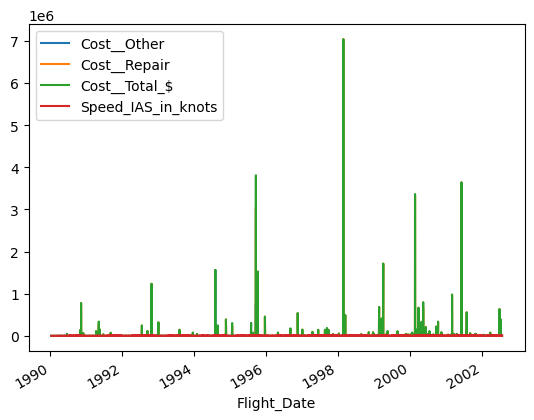

In [65]:
bs.plot()